In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
# Radius of Venus = 6051.8 km 
# Surface pressure = 92 bars
# Of latitude: 58-54 degree

In [22]:
pressure_data = pd.read_csv("Pressure_Altitude.csv")

In [23]:
pressure_data

,Pressure(bar),Radial_Distance
0,0.967948,6101.8249
1,0.856854,6102.7490
2,0.850218,6102.8071
3,0.828562,6102.9994
4,0.800032,6103.2587
...,...,...
106,0.000098,6148.3083
107,0.000078,6149.3917
108,0.000062,6150.4749
109,0.000050,6151.5628


In [24]:
pressure_data.columns

Index(['Pressure(bar)', 'Radial_Distance'], dtype='object')

In [25]:
pressure_data['Altitude(km)']= pressure_data['Radial_Distance']-6051.8
pressure_data['Pressure(Pa)'] = pressure_data['Pressure(bar)']*10**5
pressure_data['Pressure(atm)'] = pressure_data['Pressure(bar)']*0.9869

In [26]:
x= pressure_data['Pressure(atm)']
y=pressure_data['Altitude(km)']

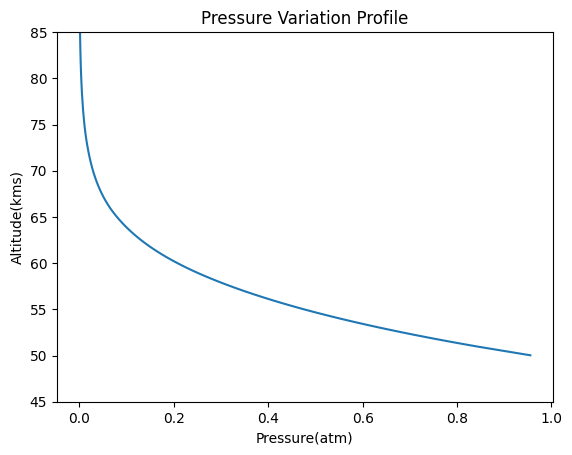

In [27]:
plt.xlabel('Pressure(atm)')
plt.ylabel('Altitude(kms)')
plt.title('Pressure Variation Profile')
plt.ylim(45,85)
plt.plot(x,y)

# Surface pressure is 91 bars

In [28]:
temp_data = pd.read_csv("Temperature.csv")
temp_data2 = pd.read_csv("equatorial_temp.csv")


In [29]:
temp_data.head()

,Radial_Dist,Temperature,sza,Lon,lat
0,6101.824883,352.504434,61.920373,166.520734,58.434710
1,6102.749043,342.537802,61.654615,166.540057,58.117350
2,6102.807146,342.241615,61.610072,166.543263,58.064125
3,6102.999387,340.465077,61.532379,166.548833,57.971265
4,6103.258709,337.623873,61.461142,166.553916,57.886094


In [30]:
temp_data2.head()

,Radial_dist,Temp,sza,Lon,lat
0,6101.6103,351.793407,70.447693,110.811821,6.044366
1,6101.7029,351.029011,70.447685,110.811790,6.048340
2,6101.8468,349.827837,70.447678,110.811752,6.052754
3,6101.9845,348.757837,70.447670,110.811729,6.056283
4,6102.0664,348.148830,70.447662,110.811699,6.059810


In [31]:
temp_data['Altitude_km'] = temp_data['Radial_Dist']-6051.8
temp_data2['Altitude_km'] = temp_data2['Radial_dist']-6051.8

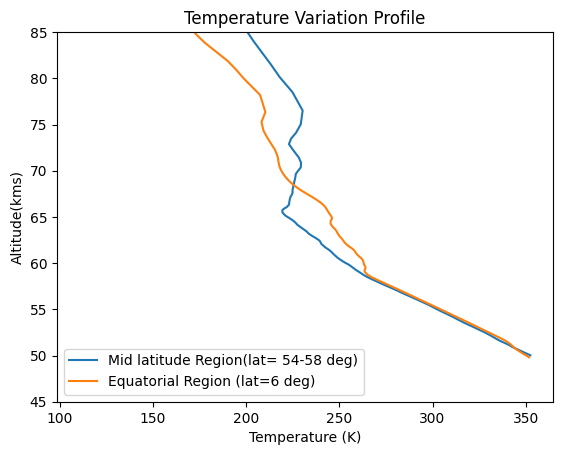

In [32]:
plt.xlabel('Temperature (K)')
plt.ylabel('Altitude(kms)')
plt.title('Temperature Variation Profile')
plt.ylim(45,85)

plt.plot(temp_data.Temperature,temp_data.Altitude_km,label="Mid latitude Region(lat= 54-58 deg)")
plt.plot(temp_data2.Temp,temp_data2.Altitude_km,label="Equatorial Region (lat=6 deg)")
plt.legend()

In [33]:
PT_data = pd.read_csv('Temperature_plus_pressure.csv')

In [34]:
PT_data.drop([109,110],inplace=True)

In [35]:
PT_data

,Radial_Dist,Temperature,Pressure(bar)
0,6101.824883,352.504434,0.967948
1,6102.749043,342.537802,0.856854
2,6102.807146,342.241615,0.850218
3,6102.999387,340.465077,0.828562
4,6103.258709,337.623873,0.800032
...,...,...,...
104,6146.174225,215.805776,0.000152
105,6147.233824,219.929578,0.000122
106,6148.308303,219.022904,0.000098
107,6149.391707,217.426891,0.000078


In [36]:
PT_data['Altitude(km)']= PT_data['Radial_Dist']-6051.8
PT_data['Pressure(atm)'] = PT_data['Pressure(bar)']*0.9869

In [37]:
PT_data.drop(['Pressure(bar)'], axis=1)

,Radial_Dist,Temperature,Altitude(km),Pressure(atm)
0,6101.824883,352.504434,50.024883,0.955268
1,6102.749043,342.537802,50.949043,0.845630
2,6102.807146,342.241615,51.007146,0.839080
3,6102.999387,340.465077,51.199387,0.817708
4,6103.258709,337.623873,51.458709,0.789552
...,...,...,...,...
104,6146.174225,215.805776,94.374225,0.000150
105,6147.233824,219.929578,95.433824,0.000121
106,6148.308303,219.022904,96.508303,0.000097
107,6149.391707,217.426891,97.591707,0.000077


In [41]:
plt.plot(PT_data['Temperature'],PT_data['Pressure(Pa)'])
plt.xlabel("Temperature")
Plt.ylabel("Pressure")
plt.title("Pressure vs Temp")

KeyError: 'Pressure(Pa)'

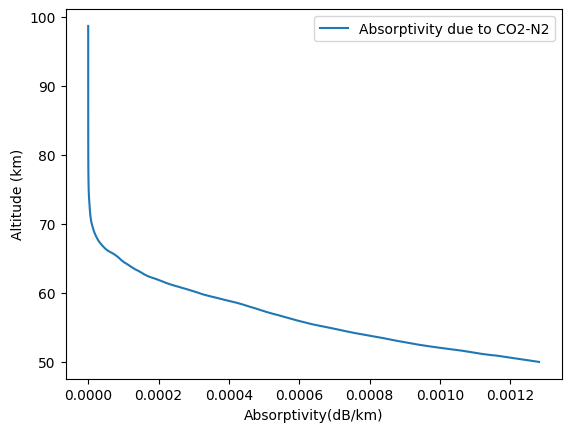

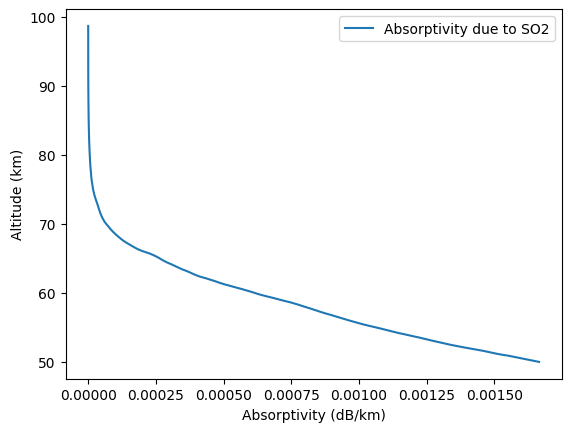

In [40]:
import random


T = PT_data['Temperature'].to_numpy()
p = PT_data['Pressure(atm)'].to_numpy()
y= PT_data['Altitude(km)'].to_numpy()

# q is the number mixing ratio of the gasses
qco2 = 0.965
qn2 = 0.035
qso2 = 0.00015  

# In GHz given in .obs file of akatsuki
f=8.410932002 

#Creating empty array
alpha_co2_n2 = np.zeros(len(T))
alpha_so2 = np.zeros(len(T))
alpha_h2so4 = np.zeros(len(T))
alpha =  np.zeros(len(T))
q_h2so4 = np.zeros(len(T))


# Taking random values of total alpha


for i in range(0,len(T)):
    alpha_co2_n2[i] = 1.15*10**8*(qco2**2 + 0.25*qco2*qn2+0.0054*qn2**2)*f**2*(p[i]**2)*T[i]**(-5)
    alpha_so2[i] = 4.3*10**6*f**2*p[i]**(1.28)*T[i]**(-2.91)*qso2
    #alpha[i]=np.random.uniform(3*10**27,4*10**27)
    #alpha_h2so4[i]= alpha[i]-alpha_co2_n2[i]- alpha_so2[i]
    
    #q_h2so4[i] = alpha_h2so4[i]/(444.57*(p[i]*1.01325**(-1)*10**(-5))**1.302*(553/T[i])**3.0)
    
    
    
    
    
fig, ax = plt.subplots()
ax.plot(alpha_co2_n2,y,label='Absorptivity due to CO2-N2')
plt.legend()
'''
def annot_max(alpha_co2_n2,y ax=None):
    ymax = y[np.argmax(alpha_co2_n2)]
    xmax = x.max()
    
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.5)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=90,angleB=20")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="left", va="bottom")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)
annot_max(alpha_co2_n2,y)
'''

plt.ylabel('Altitude (km)')
plt.xlabel('Absorptivity(dB/km)')
plt.show()



plt.plot(alpha_so2,y,label='Absorptivity due to SO2')

plt.ylabel('Altitude (km)')
plt.xlabel('Absorptivity (dB/km)')
plt.legend()
plt.show()

# plt.plot(alpha_h2so4,y,label='Absorptivity due to H2SO4')
# plt.ylabel('Altitude (km)')
# plt.xlabel('Absorptivity (dB/km)')
# plt.legend()
# plt.show()

# plt.plot(q_h2so4,y,label='Mixing ratio of H2SO4')
# plt.ylabel('Altitude (km)')
# plt.xlabel('Mixing ratio')
# plt.legend()
# plt.show()